In [337]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


# **Data Loading**

Loading the datasets ie: train.csv and test.csv 

In [369]:
ttrain = pd.read_csv("../input/titanic/train.csv")
ttrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [370]:
ttest = pd.read_csv("../input/titanic/test.csv")
ttest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data cleaning has to be done by identifying number of missing values within the datasets.

In [371]:
print("Shape of Training set")
print(ttrain.shape)
print("\nShape of Testing set")
print(ttest.shape)

Shape of Training set
(891, 12)

Shape of Testing set
(418, 11)


In [372]:
print("Information of training set\n")
print(ttrain.info())
print("\nInformation of testing set\n")
print(ttest.info())

Information of training set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Information of testing set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  

# **Data Cleaning**

The training set consists of 891 values and testing set consists of 418. 
From the above output we know that values from 'Age and Cabin' are missing from the ttrain as well as ttest dataset.
Along with 'Age and Cabin' the values from features 'Embarked' and 'Fare' are missing from the ttrain and ttest dataset respectively.
The output below shows the percentage of missing values from each of the dataset.

In [373]:
print("Missing value in training set")
train = round(((ttrain.isnull().sum()*100)/(ttrain.shape[0])),3).sort_values(ascending=False).head(5)
print(train)

print("\nMissing value in test set")
test = round(((ttest.isnull().sum()*100)/(ttrain.shape[0])),3).sort_values(ascending=False).head(5)
print(test)

Missing value in training set
Cabin       77.104
Age         19.865
Embarked     0.224
Fare         0.000
Ticket       0.000
dtype: float64

Missing value in test set
Cabin       36.700
Age          9.652
Fare         0.112
Embarked     0.000
Ticket       0.000
dtype: float64


The training set consists of 891 values.
The missing values of the features from the training set are handelled as follows:
* Age = Since the percentage of missing values is less, the mean of the column is substitued with the missings values
* Cabin = Since the percentage of missing values is very high the column is dropped
* Embarked = Since the percentage of missing values is very low, the higgest frequency value is substitued with the missings values

In [374]:
#Age
train_mean = round(ttrain['Age'].mean(),0) 
ttrain['Age'] = ttrain['Age'].fillna(train_mean)

#Cabin
ttrain.drop(['Cabin'],inplace=True,axis=1)
ttrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [375]:
#Embarked
print(ttrain['Embarked'].value_counts())

value = ttrain['Embarked'].value_counts().index[0]

#Since the frequency of 'S' is the highest we substitute the missing values with 'S'
ttrain['Embarked'] = ttrain['Embarked'].fillna(value) 

S    644
C    168
Q     77
Name: Embarked, dtype: int64


The testing set consists of 418.
The missing values of the features from the testing set are handled as follows:
* Age = Since the percentage of missing values is low, the mean of the column is substitued with the missings values
* Cabin = Since the percentage of missing values is very high the column is dropped
* Fare = Since the percentage of missing values is very low, the higgest frequency value is substitued with the missings values

In [376]:
#Age
test_mean = round(ttest['Age'].mean(),0) 
ttest['Age'] = ttest['Age'].fillna(test_mean)

#Cabin
ttest.drop(['Cabin'],inplace=True,axis=1)
ttest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [377]:
#Fare
print(ttest['Fare'].mode())
test = ttest['Fare'].mode()[0]

#Since the frequency of '7.7500' is the highest we substitute the missing values with '7.7500'
ttest['Fare'] = ttest['Fare'].fillna(test) 

0    7.75
dtype: float64


In [378]:
print("Missing value in training set")
print(ttrain.isnull().sum())
print("\nMissing value in test set")
print(ttest.isnull().sum())

Missing value in training set
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Missing value in test set
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


All the missing values within the datasets have been dealt with and the datasets are clean. Thus we now perform Exploratory Data Analysis (EDA).

# **Exploratory Data Analysis (Data Visualization)**

In [48]:
ttrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Survived
0    549
1    342
Name: PassengerId, dtype: int64


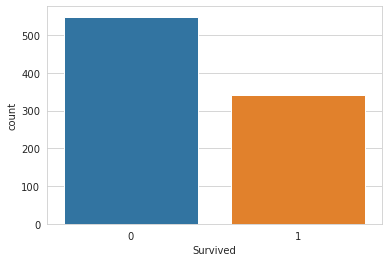

In [111]:
print(ttrain.groupby(['Survived']).count()['PassengerId'])
sns.countplot(x='Survived',data=ttrain)

The number of survivors are very few.

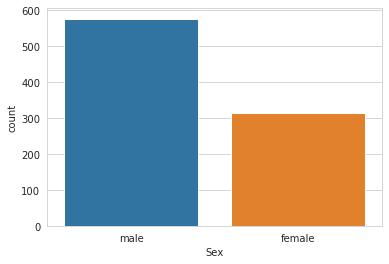

In [108]:
sns.countplot(x='Sex',data=ttrain)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 



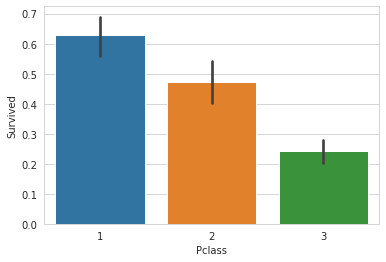

In [49]:
print(ttrain.groupby(['Pclass']).mean()['Survived'],"\n")
sns.barplot(x='Pclass',y='Survived',data=ttrain)

It is observed that there are more survivors from passanger class 1.

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64 



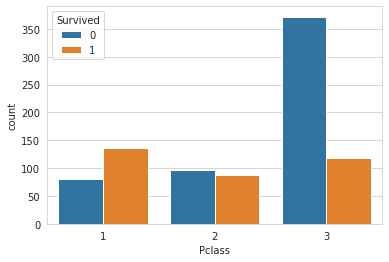

In [87]:
print(ttrain.groupby(['Pclass','Survived']).count()['PassengerId'],"\n")
sns.countplot(x='Pclass',hue='Survived',data=ttrain)

Passengers from the 3rd passanger class were not able to survive.

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: PassengerId, dtype: int64 



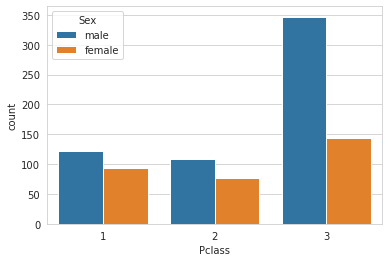

In [90]:
print(ttrain.groupby(['Pclass','Sex']).count()['PassengerId'],"\n")
sns.countplot(x='Pclass',hue='Sex',data=ttrain)

It is observed that there are many male passangers and the maximum number of passangers belonged to the 3rd passanger class.

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64 



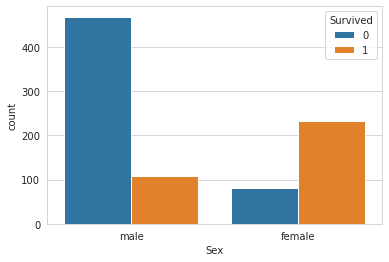

In [88]:
print(ttrain.groupby(['Sex','Survived']).count()['PassengerId'],"\n")
sns.countplot(x='Sex',hue='Survived',data=ttrain)

There are a large number of female passangers who were able to survive.

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64 



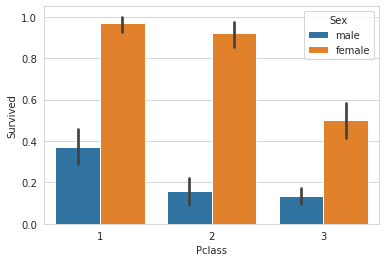

In [51]:
print(ttrain.groupby(['Pclass','Sex']).mean()['Survived'],"\n")
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=ttrain)

The above plot shows that many survivors are females among Pclass 1 and 2 .

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: PassengerId, dtype: int64 



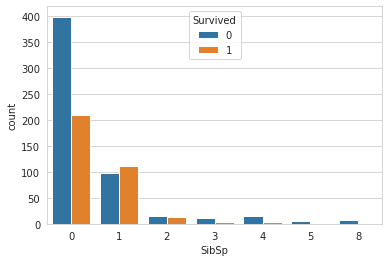

In [52]:
print(ttrain.groupby(['SibSp','Survived']).count()['PassengerId'],"\n")
sns.countplot(x='SibSp',hue='Survived',data=ttrain)

A large number of passengers who had been travelling alone were not able to survive.

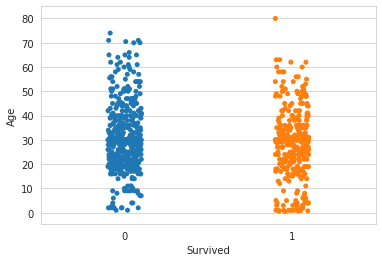

In [178]:
sns.stripplot(x='Survived',y='Age',data=ttrain,jitter=True)

Passengers between the age of 0-65 have survived with an exception of 1 passenger of age 80.

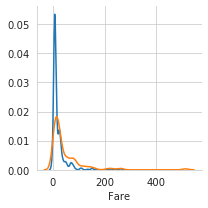

In [54]:
tfare = sns.FacetGrid(data=ttrain,hue='Survived')
tfare.map(sns.kdeplot,'Fare')

The survivors include those who have paid a higher conveyance fare.

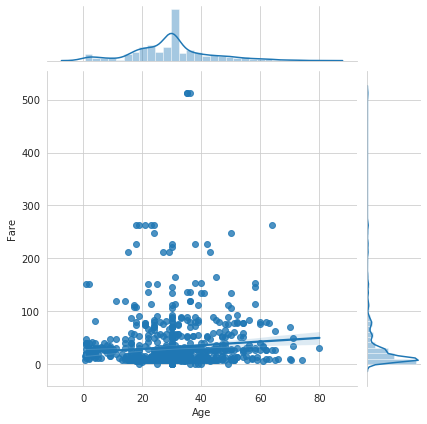

In [55]:
sns.jointplot(x='Age',y='Fare',data=ttrain,kind='reg')

There is no relation between Age and Fare paid for conveyance.
Titanic has many passengers between the age 20-40.
Most of the tickets purchased costs less comparatively. 

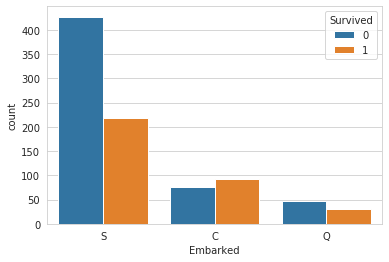

In [56]:
sns.countplot(x='Embarked',hue='Survived',data=ttrain)

Passangers that had board the ship from Southampton are unlikely to survive.

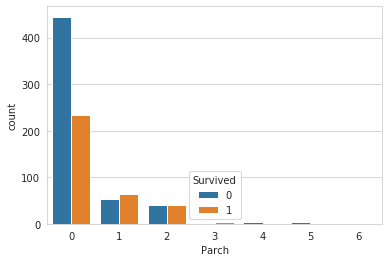

In [57]:
sns.countplot(x='Parch',hue='Survived',data=ttrain)

Parch can not help us to determine any pattern of survivors.

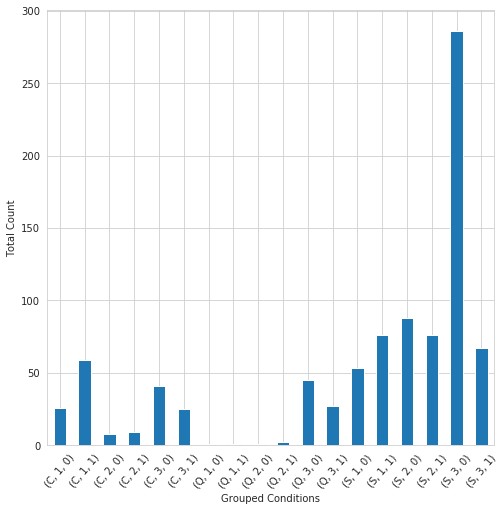

In [112]:
target = ttrain.groupby(['Embarked','Pclass','Survived'])

plt.figure(figsize=(8,8))
target.count()['PassengerId'].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Grouped Conditions")
plt.ylabel("Total Count")

plt.show()

The majority survivers include those who board the titanic from Southampton (S) and belonged to the 1-2 class. Unfortunately the passengers from the 3 class who board from the same port did not surive

In [104]:
correlate = ttrain.corr()
correlate

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033019,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.070657,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.329727,0.083081,0.018443,-0.549500
Age,0.033019,-0.070657,-0.329727,1.000000,-0.232440,-0.180330,0.090632
SibSp,-0.057527,-0.035322,0.083081,-0.232440,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.180330,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.090632,0.159651,0.216225,1.000000


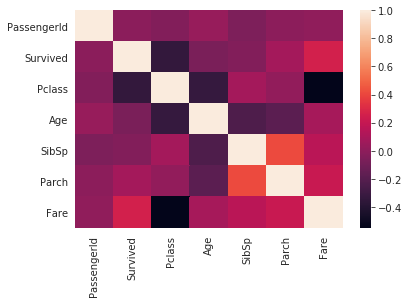

In [105]:
sns.heatmap(correlate)

The relationship between each and every feature can be represented by identifying the postive and negative correalation between them and then visualizing them into a heatmap 

# **Summary of Observation**

*  Less than half of the total number of passenger had survived the titanic accident.
*  The number of male passengers were more than the female passengers.
*  Maximum number of passengers traveled in the 3rd passenger class as the fare of the same was economically feasible.
*  Many passengers were travelling alone.
*  There were 3 ports from where the passenger could board.
*  All the passengers travelling were below the age of 75. Although there was a single exception of a passenger of age 80.
*  The maximum cost of the ticket for the titanic was above 500$.
*  The survivors majorly included:
>     1. Female passangers.
>     2. Passangers from the 1st passenger class.
>     3. Passanger with sibling, spouse, parent or children. 

# **Feature Engineering**

Before preparing any model it is essential to process the dataset and create a dataset with numeric values.

In [379]:
print("Columns of training set")
print(ttrain.columns)
print("\nColumns of testing set")
print(ttest.columns)

Columns of training set
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Columns of testing set
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


Passengers ID and Ticket are unique values for each individual, we can not use them to build a model or predict any future outcomes. Thus it is desirable to drop these columns from the training and the testing set.

In [380]:
data = [ttrain, ttest]
for dataset in data:
    dataset.drop(['PassengerId','Ticket'],axis=1,inplace=True)

We notice that sibling, spouse, parents and children are relations for a passenger, therefore we can club them into 1 single feature. 

In [381]:
for dataset in data:
    dataset['Relation'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Relation'] > 0, 'Travelled_alone'] = 'No'
    dataset.loc[dataset['Relation'] == 0, 'Travelled_alone'] = 'Yes'

In [382]:
print("Information of training set\n")
print(ttrain.info())
print("\nInformation of testing set\n")
print(ttest.info())

Information of training set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Name             891 non-null    object 
 3   Sex              891 non-null    object 
 4   Age              891 non-null    float64
 5   SibSp            891 non-null    int64  
 6   Parch            891 non-null    int64  
 7   Fare             891 non-null    float64
 8   Embarked         891 non-null    object 
 9   Relation         891 non-null    int64  
 10  Travelled_alone  891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None

Information of testing set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------         

The training and testing set includes object and floating values. It is a good practice to always feed in numerical (Integer) values into a predictive data model. Hence we know convert the two objects into numerical value. We also notice that we do not have any categorical value for the features Age and Fare, thus we seprate them into categories such that they can be easily used as an input to a model. 

In [383]:
for dataset in data:
    dataset['Travelled_alone'] = dataset['Travelled_alone'].map({'No':0,'Yes':1})
    dataset['Sex'] = dataset['Sex'].map({'male':0,'female':1})
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2})

In [384]:
def age(num): 
    
    if num <= 11: 
        return 0
  
    elif num > 11 and num <= 18:
        return 1
    
    elif num > 18 and num <= 22:
        return 2
    
    elif num > 22 and num <= 27:
        return 3
    
    elif num > 27 and num <= 33:
        return 4
    
    elif num > 33 and num <= 40:
        return 5
    
    elif num > 40 and num <= 66:
        return 6
    
    else: 
        return 7
    
    
def fare(num): 
    
    if num <= 7.91: 
        return 0
  
    elif num > 7.91 and num <= 33:
        return 1
    
    elif num > 33 and num <= 66:
        return 2
    
    elif num > 66 and num <= 99:
        return 3
    
    elif num > 99 and num <= 250:
        return 4
    
    elif num > 250 and num <= 360:
        return 5
   
    else: 
        return 6


In [385]:
for dataset in data:
    dataset['Age'] = dataset['Age'].apply(age)
    dataset['Fare'] = dataset['Fare'].apply(fare)

In [386]:
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Age'] = dataset['Age'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset['Age'] = dataset['Age'].astype(int)

In [387]:
print("Information of training set\n")
print(ttrain.info())
print("\nInformation of testing set\n")
print(ttest.info())

Information of training set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Survived         891 non-null    int64 
 1   Pclass           891 non-null    int64 
 2   Name             891 non-null    object
 3   Sex              891 non-null    int64 
 4   Age              891 non-null    int64 
 5   SibSp            891 non-null    int64 
 6   Parch            891 non-null    int64 
 7   Fare             891 non-null    int64 
 8   Embarked         891 non-null    int64 
 9   Relation         891 non-null    int64 
 10  Travelled_alone  891 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 76.7+ KB
None

Information of testing set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 


In [388]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset['Title'] = dataset['Title'].astype(int)

In [389]:
for dataset in data:
    dataset.drop(['Name'],axis=1,inplace=True)

In [390]:
print("Information of training set\n")
print(ttrain.info())
print("\nInformation of testing set\n")
print(ttest.info())

Information of training set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Survived         891 non-null    int64
 1   Pclass           891 non-null    int64
 2   Sex              891 non-null    int64
 3   Age              891 non-null    int64
 4   SibSp            891 non-null    int64
 5   Parch            891 non-null    int64
 6   Fare             891 non-null    int64
 7   Embarked         891 non-null    int64
 8   Relation         891 non-null    int64
 9   Travelled_alone  891 non-null    int64
 10  Title            891 non-null    int64
dtypes: int64(11)
memory usage: 76.7 KB
None

Information of testing set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Pclass           418 n

# **Data Modeling**

For the purpose of Data Modeling we need to split our data into training and test set.
Once the split is done we can put our data into various models and check each the precision of each model.
We select the model with the highest precision score.

In [391]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [395]:
X = ttrain.drop('Survived',axis=1)
y = ttrain['Survived']

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# 1. Logistic Regression

In [397]:
#Import Packages 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [480]:
#Object creation and fitting of training set
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [481]:
#Creation of a prediction variable
predict1 = model1.predict(X_test)

In [482]:
#Accuracy Matrix
print("\nClassification Matrix")
print(classification_report(y_test,predict1))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,predict1))


Classification Matrix
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       154
           1       0.81      0.69      0.75       114

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268


Confusion Matrix
[[136  18]
 [ 35  79]]


In [483]:
#Accuracy Percentage
predict11 = round((model1.score(X_test, y_test)*100),0)
print("Precision of Logistic Regression is: ",predict11,"%") 

Precision of Logistic Regression is:  80.0 %


# 2. K-Nearest Neighbour

In [408]:
#Import Packages 
from sklearn.neighbors import KNeighborsClassifier

In [409]:
#Object creation and fitting of training set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [410]:
#Creation of a prediction variable
predictionsknn = knn.predict(X_test)

In [411]:
#Accuracy Matrix
print("\nClassification Matrix")
print(classification_report(y_test,predictionsknn))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,predictionsknn))


Classification Matrix
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       154
           1       0.82      0.68      0.75       114

    accuracy                           0.80       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268


Confusion Matrix
[[137  17]
 [ 36  78]]


In [412]:
#Accuracy Percentage
knnp = round((knn.score(X_test, y_test)*100),0)
print("Precision of K Nearest Neighbors is: ",knnp,"%") 

Precision of K Nearest Neighbors is:  80.0 %


# 3. Decision Tree

In [413]:
#Import Packages 
from sklearn.tree import DecisionTreeClassifier

In [414]:
#Object creation and fitting of training set
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [415]:
#Creation of a prediction variable
predictiondt = dtree.predict(X_test)

In [416]:
#Accuracy Matrix
print("\nClassification Matrix")
print(classification_report(y_test,predictiondt))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,predictiondt))


Classification Matrix
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       154
           1       0.92      0.69      0.79       114

    accuracy                           0.84       268
   macro avg       0.86      0.82      0.83       268
weighted avg       0.85      0.84      0.84       268


Confusion Matrix
[[147   7]
 [ 35  79]]


In [417]:
#Accuracy Percentage
dtt = round((dtree.score(X_test, y_test)*100),0)
print("Precision of Decision Tree is: ",dtt,"%") 

Precision of Decision Tree is:  84.0 %


# 4. Random Forest

In [418]:
#Import Packages 
from sklearn.ensemble import RandomForestClassifier

In [419]:
#Object creation and fitting of training set
randfc = RandomForestClassifier(n_estimators=100)
randfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [420]:
#Creation of a prediction variable
predictionrf = randfc.predict(X_test)

In [421]:
#Accuracy Matrix
print("\nClassification Matrix")
print(classification_report(y_test,predictionrf))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,predictionrf))


Classification Matrix
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       154
           1       0.89      0.69      0.78       114

    accuracy                           0.83       268
   macro avg       0.85      0.81      0.82       268
weighted avg       0.84      0.83      0.83       268


Confusion Matrix
[[144  10]
 [ 35  79]]


In [423]:
#Accuracy Percentage
random = round((randfc.score(X_test, y_test)*100),0)
print("Precision of Random Forest is: ",random,"%") 

Precision of Random Forest is:  83.0 %


# 5. Support Vector Machine

In [424]:
#Import Packages 
from sklearn.svm import SVC

In [425]:
#Object creation and fitting of training set
svcm = SVC()
svcm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [426]:
#Creation of a prediction variable
predictionsvc = svcm.predict(X_test)

In [427]:
#Accuracy Matrix
print("\nClassification Matrix")
print(classification_report(y_test,predictionsvc))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,predictionsvc))


Classification Matrix
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       154
           1       0.82      0.70      0.76       114

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268


Confusion Matrix
[[137  17]
 [ 34  80]]


In [428]:
#Accuracy Percentage
svc = round((svcm.score(X_test, y_test)*100),0)
print("Precision of Support Vector Classifier: ",svc,"%")


Precision of Support Vector Classifier:  81.0 %


# 6. Gaussian Naive Bayes

In [429]:
#Import Packages 
from sklearn.naive_bayes import GaussianNB

In [430]:
#Object creation and fitting of training set
gaus = GaussianNB()
gaus.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [431]:
#Creation of a prediction variable
predictiongus = gaus.predict(X_test)

In [433]:
#Accuracy Matrix
print("\nClassification Matrix")
print(classification_report(y_test,predictiongus))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,predictiongus))


Classification Matrix
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       154
           1       0.75      0.75      0.75       114

    accuracy                           0.78       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268


Confusion Matrix
[[125  29]
 [ 29  85]]


In [434]:
#Accuracy Percentage
rig = round((gaus.score(X_test, y_test)*100),0)
print("Precision of Gaussian Naive Bayes is: ",rig,"%") 

Precision of Gaussian Naive Bayes is:  78.0 %


# **7. Logistic Regression CV**

In [435]:
#Object creation and fitting of training set
lgrcv = LogisticRegressionCV()
lgrcv.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [436]:
#Creation of a prediction variable
predictionlgcv = lgrcv.predict(X_test)

In [437]:
#Accuracy Matrix
print("\nClassification Matrix")
print(classification_report(y_test,predictionlgcv))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,predictionlgcv))


Classification Matrix
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       154
           1       0.81      0.69      0.75       114

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268


Confusion Matrix
[[136  18]
 [ 35  79]]


In [438]:
#Accuracy Percentage
lgcv = round((lgrcv.score(X_test, y_test)*100),0)
print("Precision of  Logistic Regression CV is: ",lgcv,"%") 

Precision of  Logistic Regression CV is:  80.0 %


# **8. Gradient Boosting Classifier**

In [439]:
#Import Packages 
from sklearn.ensemble import GradientBoostingClassifier

In [440]:
#Object creation and fitting of training set
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [441]:
#Creation of a prediction variable
predictiongbc = gbc.predict(X_test)

In [442]:
#Accuracy Matrix
print("\nClassification Matrix")
print(classification_report(y_test,predictiongbc))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,predictiongbc))


Classification Matrix
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       154
           1       0.87      0.68      0.76       114

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268


Confusion Matrix
[[142  12]
 [ 36  78]]


In [443]:
#Accuracy Percentage
gbcp = round((gbc.score(X_test, y_test)*100),0)
print("Precision of Gradient Boosting Classifier is: ",gbcp,"%") 

Precision of Gradient Boosting Classifier is:  82.0 %


# **9. Perceptron**

In [444]:
#Import Packages 
from sklearn.linear_model import Perceptron

In [476]:
#Object creation and fitting of training set
per = Perceptron(max_iter=6)
per.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=6, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [477]:
#Creation of a prediction variable
predictionper = per.predict(X_test)

In [478]:
#Accuracy Matrix
print("\nClassification Matrix")
print(classification_report(y_test,predictionper))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,predictionper))


Classification Matrix
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       154
           1       0.71      0.75      0.73       114

    accuracy                           0.76       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.76      0.77       268


Confusion Matrix
[[119  35]
 [ 28  86]]


In [479]:
#Accuracy Percentage
perr = round((per.score(X_test, y_test)*100),0)
print("Precision of Perceptron is: ",perr,"%") 

Precision of Perceptron is:  76.0 %


# 10. Stochastic Gradient Descent (SGD)

In [535]:
#Import Packages 
from sklearn.linear_model import SGDClassifier

In [536]:
#Object creation and fitting of training set
model2 = SGDClassifier()
model2.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [537]:
#Creation of a prediction variable
predict2 = model2.predict(X_test)

In [538]:
#Accuracy Matrix
print("\nClassification Matrix")
print(classification_report(y_test,predict2))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,predict2))


Classification Matrix
              precision    recall  f1-score   support

           0       0.72      0.99      0.83       154
           1       0.96      0.47      0.64       114

    accuracy                           0.77       268
   macro avg       0.84      0.73      0.73       268
weighted avg       0.82      0.77      0.75       268


Confusion Matrix
[[152   2]
 [ 60  54]]


In [539]:
linr = round((model2.score(X_test, y_test)*100),0)
print("Precision of Stochastic Gradient Descent is: ",linr,"%") 

Precision of Stochastic Gradient Descent is:  77.0 %


# **Conclusion**

In [541]:
results = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Support Vector Machines',  
                                  'Gausian Naive Baye', 'Logistic Regression CV', 'Stochastic Gradient Decent', 'Perceptron','Stochastic Gradient Descent'],
                        'Score': [predict11, knnp, dtt, random, svc, rig, lgcv, gbcp, perr,linr]
                      })

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(10)

,Model
Score,
84.0,Decision Tree
83.0,Random Forest
82.0,Stochastic Gradient Decent
81.0,Support Vector Machines
80.0,Logistic Regression
80.0,KNN
80.0,Logistic Regression CV
78.0,Gausian Naive Baye
77.0,Stochastic Gradient Descent


We observe the with the precision of the Decision Tree algorithm is the highest.Thus we can use Decision Tree for the future analysis of our dataset.   